## Import

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [89]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
colors = ['#78c850', '#c86450', '#50b4c8' ,'#a050c8']


## 1
Анализ фродовых данных

### groupby

In [91]:
frod_df = pd.read_csv('/content/drive/MyDrive/junior/8_dataPreparation/frod_df.csv')

In [92]:
frod_df.shape

(2846907, 7)

In [93]:
frod_df.head()

,user_id,funnel_stage,timestamp,profit,os,add_channel,price
0,910643,interest,150028,NaN,ios,search,1.5
1,910643,interest,150029,NaN,android,search,1.5
2,910643,interest,150029,NaN,ios,search,1.5
3,910643,interest,150029,NaN,ios,search,1.5
4,910643,interest,150029,NaN,android,search,1.5


In [94]:
data = frod_df.groupby(['funnel_stage'], as_index=False).agg(user_count=('user_id', 'count'))

In [95]:
data.head()

,funnel_stage,user_count
0,consideration,6
1,intent,229059
2,interest,2617842


### visual

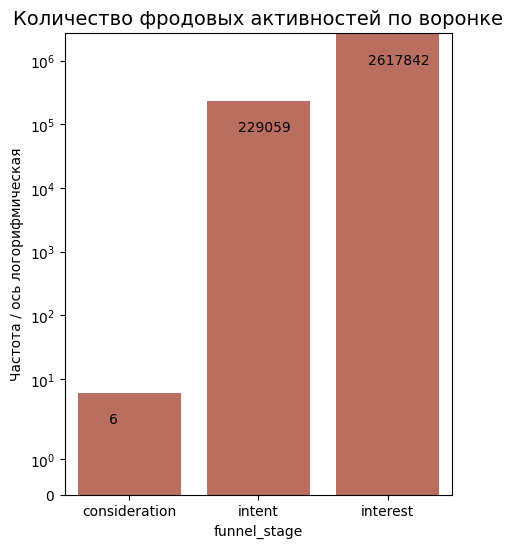

In [96]:
# Задаем размер графика
plt.figure(figsize=(5,6))
y=data['user_count']
x=data['funnel_stage']
# Рисуем гистограмму
sns.barplot(y = y, x = x, color=colors[1])
# Заголовок
plt.title('Количество фродовых активностей по воронке', fontsize=14)
# Название оси X
plt.xlabel('funnel_stage')
# Название оси Y
plt.yscale("symlog")
plt.ylabel('Частота / ось логорифмическая')
for j, i in zip(range(3), y):
  plt.annotate(str(i), xy=(j, i), xytext=(-20, -30), textcoords='offset pixels')
plt.show()

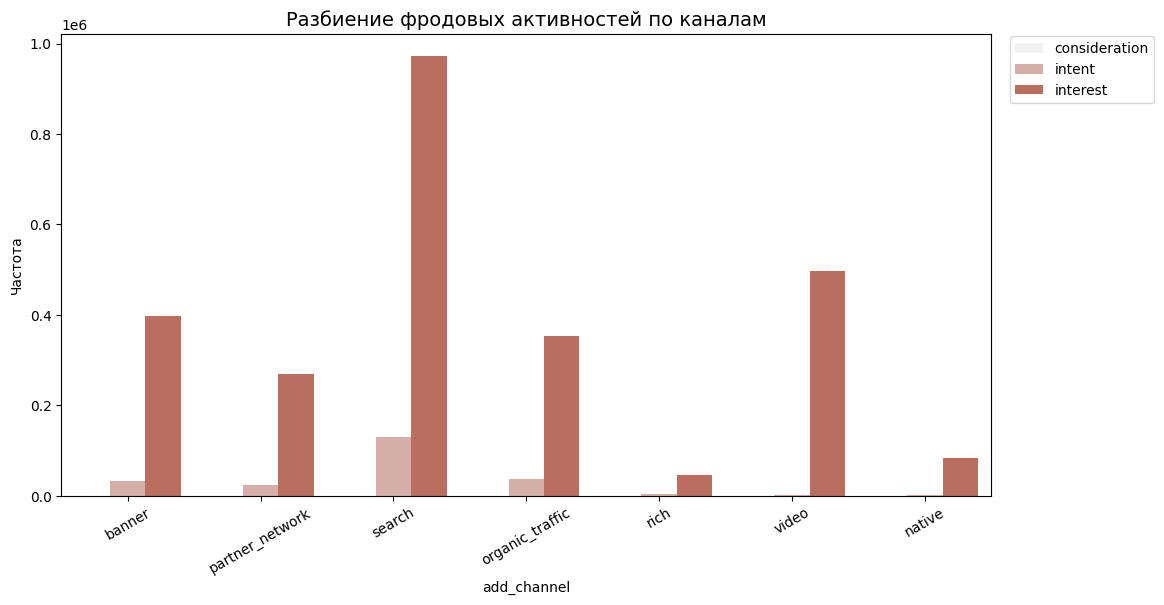

In [97]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data=frod_df.sort_values(by = ['funnel_stage']), x="add_channel", hue='funnel_stage', color=colors[1])
ax.legend(loc=(1.02, 0.85))
ax.set_title('Разбиение фродовых активностей по каналам', fontsize=14)
# Поворачиваем подпись на осях
ax.tick_params(axis='x', labelrotation=30)
# Подпись к оси Y
ax.set_ylabel('Частота')

plt.show()

### conclusion
 Последний этап воронки не имеет фродов т.к информация о транзакциях находиться и на стороне заказчика поэтому легко сопоставить данные. Активности в interest , intent возможно созданы помощью ботов с переходами по необходимым ссылкам. Затрудняюсь объяснить почему consideration значительно менее скомпрометирован чем interest , intent поэтому требуется уточнение по какому признаку активности попадают на этот этап воронки.

## 2
Выбор наиболее перспективного канала коммуникации.

### groupby

In [98]:
cleaned_df = pd.read_csv('/content/drive/MyDrive/junior/9_correlation/data_clear.csv')

In [99]:
cleaned_df.shape

(976210, 7)

In [100]:
cleaned_df.head(5)

,user_id,funnel_stage,timestamp,profit,os,add_channel,price
0,219687,interest,150000,NaN,android,banner,0.50
1,26717,consideration,150000,NaN,android,organic_traffic,0.00
2,793204,consideration,150000,NaN,android,video,0.75
3,111649,consideration,150000,NaN,android,video,0.75
4,991236,interest,150000,NaN,android,native,2.00


In [101]:
#group_df = cleaned_df.groupby(['add_channel', 'funnel_stage']).agg(user_count=('user_id', 'count')).unstack(1)

In [102]:
group_df = cleaned_df.groupby(['add_channel', 'funnel_stage'])['user_id'].count().unstack(1
                                                                                          ).reset_index(
                                                                                          ).sort_values(
                                                                                              by=['interest','consideration'], ascending=False)

In [103]:
group_df.head(10)

funnel_stage,add_channel,consideration,intent,interest,purchase
5,search,134301,27243,222898,3090
6,video,60880,57,97058,5
0,banner,47540,7566,91282,688
2,organic_traffic,53592,9095,78064,542
3,partner_network,24720,4378,65740,450
1,native,12597,409,19229,37
4,rich,4657,1231,8839,22


In [104]:
3090/222898

0.013862843094150687

In [105]:
22/8839

0.0024889693404231247

In [106]:
3090/222898

0.013862843094150687

###visual

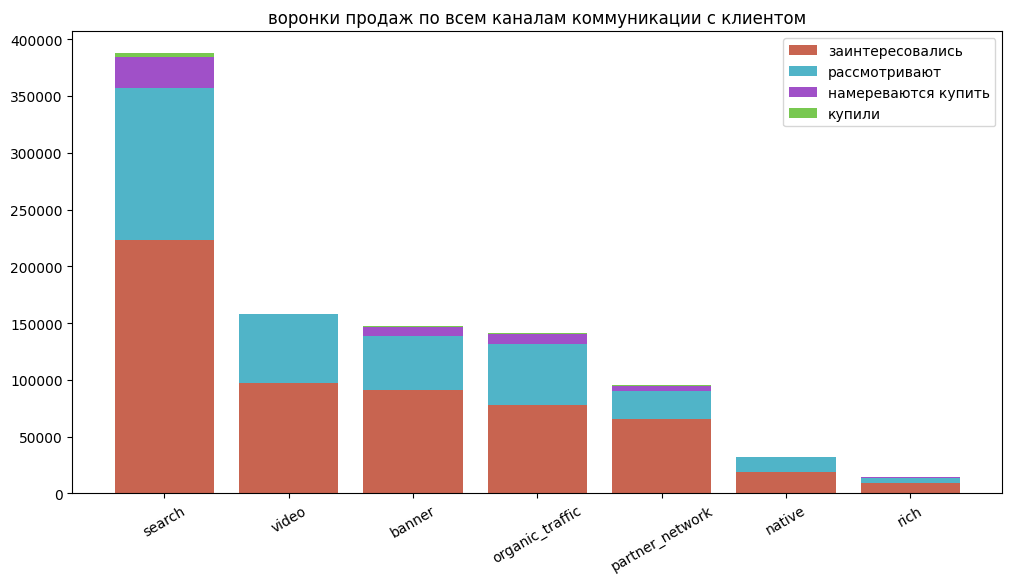

In [107]:
# Данные в переменные
add_channel = group_df.add_channel
interest= group_df.interest
consideration = group_df.consideration
intent = group_df.intent
purchase = group_df.purchase

# Создание объекта графика и осей
fig, ax = plt.subplots(figsize=(12,6))
# Нарисовать столбцы
ax.bar(add_channel, interest, color=colors[1], label='заинтересовались')
ax.bar(add_channel, consideration, bottom=interest,
       color=colors[2],
       label='рассмотривают')
ax.bar(add_channel, intent, bottom=interest+consideration,
       color=colors[3],
       label='намереваются купить')
ax.bar(add_channel, purchase, bottom=interest+consideration+intent,
       color=colors[0],
       label='купили')

# Настраиваем легенду и заголовок
#ax.legend(loc=(1.02, 0.85))
ax.set_title('воронки продаж по всем каналам коммуникации с клиентом')
# Поворачиваем подпись на осях
ax.tick_params(axis='x', labelrotation=30)
# Легенда
ax.legend(loc='upper right')

plt.show()

###conclusion
Каналы video, native, rich практически нет переходов с этапа consideration на след уровень воронки поэтому эти каналы наименьшим образом подходят для продаж. Стоить отметь что канал video можно использовать с точки зрения осведомленности о бренде так например заинтересованность по каналу video  в 2,3 меньше search при этом расходы на канала  search в 5 раз выше.

##3
P&L в разрезе каналов коммуникации

### groupby

In [108]:
group_profit_df = cleaned_df.groupby(['add_channel']).agg(coast=('price', 'sum'),
                                                          profit=('profit', 'sum')).sort_values(by=['profit']).reset_index()

In [109]:
group_profit_df

,add_channel,coast,profit
0,video,118500.0,4582.0
1,rich,36872.5,33511.0
2,native,64544.0,37355.0
3,organic_traffic,0.0,367094.0
4,partner_network,95288.0,445411.0
5,banner,73538.0,497881.0
6,search,581298.0,2112193.0


### visual

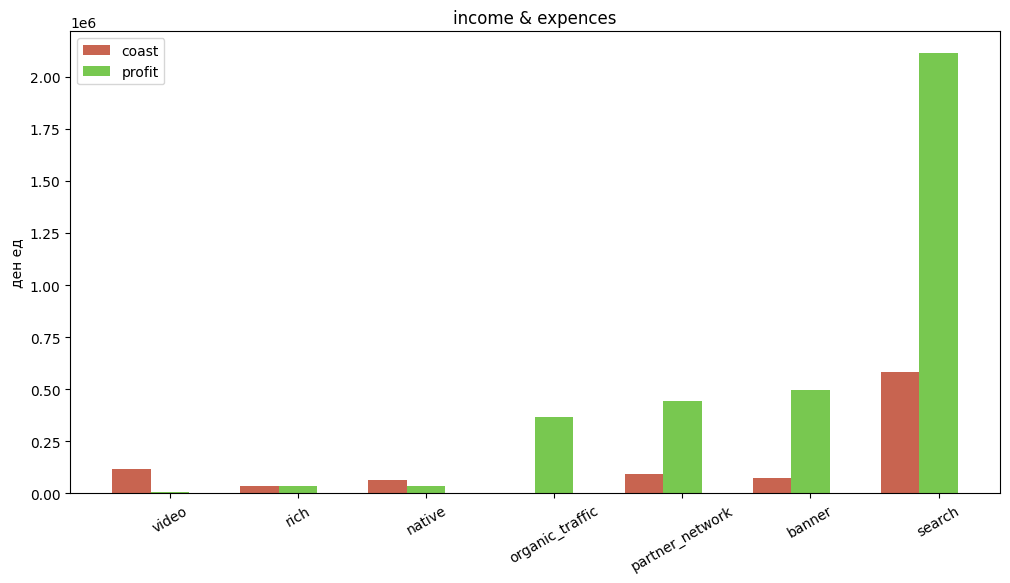

In [110]:
add_channel = group_profit_df.add_channel
coast= group_profit_df.coast
profit = group_profit_df.profit

# Настройка параметров графика
bar_width = 0.3
index = np.arange(len(add_channel))

# Создание объекта графика и осей
fig, ax = plt.subplots(figsize=(12,6))
# Нарисовать столбцы
ax.bar(index, coast, bar_width,
                color=colors[1],
                label='coast')
ax.bar(index + bar_width, profit, bar_width,
                color=colors[0],
                label='profit')

# Настройка осей и заголовка
ax.set_ylabel('ден ед')
ax.set_title('income & expences')
# Указываем место для подписей
ax.set_xticks(index + bar_width)
# Указываем название подписей
ax.set_xticklabels(add_channel)
# Поворачиваем подпись на осях
ax.tick_params(axis='x', labelrotation=30)
# Легенда
ax.legend(loc='upper left')
# Отображение графика
plt.show()

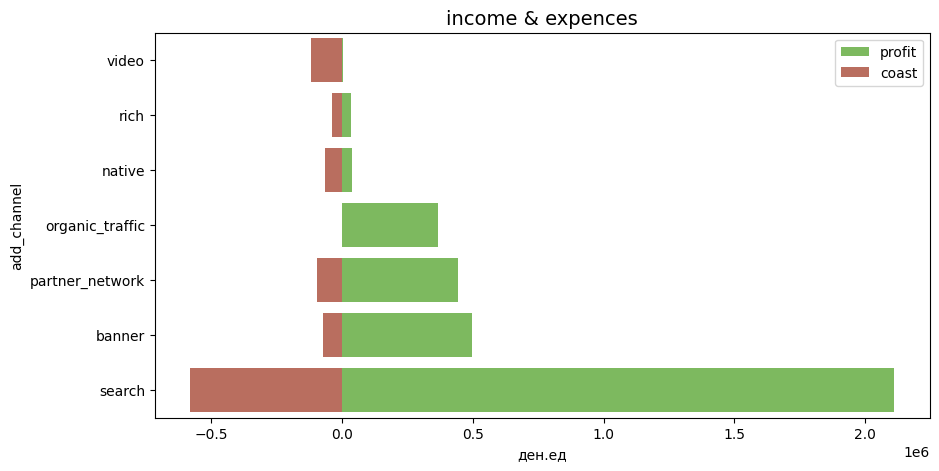

In [111]:
# Задаем размер графика
plt.figure(figsize=(10,5))

# Рисуем столбчатый график
sns.barplot(y=group_profit_df['add_channel'], x=group_profit_df['profit'],
            color= colors[0], label='profit')
sns.barplot(y=group_profit_df['add_channel'], x=group_profit_df['coast']*(-1),
            color= colors[1], label='coast')

# Название
plt.title('income & expences', fontsize=14)
# Подпись к оси X

plt.xlabel('ден.ед')

plt.legend(loc='upper right')
# Отображение графика
plt.show()

##4
График распределения операционной системы пользователя для каждого канала коммуникации

### groupby

In [112]:
group_os_df = cleaned_df.groupby(['add_channel','os']).agg(coast=('os', 'count')).reset_index()

In [113]:
group_os_df

,add_channel,os,coast
0,banner,android,103001
1,banner,ios,44075
2,native,android,9837
3,native,ios,22435
4,organic_traffic,android,84912
5,organic_traffic,ios,56381
6,partner_network,android,47630
7,partner_network,ios,47658
8,rich,android,2987
9,rich,ios,11762


### visual

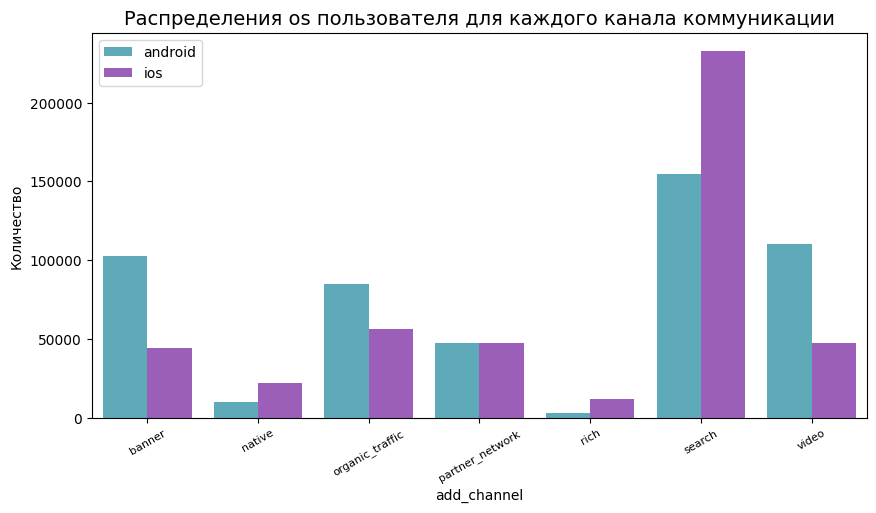

In [114]:

# Задаем размер графика
plt.figure(figsize=(10,5))
# Рисуем линию
sns.barplot(x='add_channel', y='coast', data = group_os_df, hue='os', palette=colors[2:])
# Заголовок
plt.title('Распределения os пользователя для каждого канала коммуникации', fontsize=14)
# Поворачиваем подписи на оси x
plt.xticks(fontsize=8 ,rotation=30)
# Название оси X
#plt.xlabel('Дата', fontsize=10)
# Название оси X
plt.ylabel('Количество', fontsize=10)
# Легенда
plt.legend(loc='upper left')
plt.show()

### conclusion

Video и баннеры большо смотрят на android возможно эти пользовати больше времени проводят в свободном серфинге в сетях. Пользователи ios больше сфокусированы на решении конкретных задач потому в search их доля выше, кроме того, доля ios среди пользователей по каналу rich выше возможно это связанно с их более высоким доходом.


In [121]:
!jupyter nbconvert --to html /content/fraud_data_analysis.ipynb

[NbConvertApp] Converting notebook /content/fraud_data_analysis.ipynb to html
[NbConvertApp] Writing 944385 bytes to /content/fraud_data_analysis.html
